<a href="https://colab.research.google.com/github/alexiaddiaz0907/DSC450/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [103]:
link = 'https://drive.google.com/file/d/1Rn-D6pzM8fRkv1O8bEsAa-vK5CVy-l-F/view?usp=sharing'

import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('employee_reviews') 
 
df = pd.read_csv('employee_reviews', encoding='latin-1')
print(df)

       Unnamed: 0    company           location          dates  \
0               1     google               none   Dec 11, 2018   
1               2     google  Mountain View, CA   Jun 21, 2013   
2               3     google       New York, NY   May 10, 2014   
3               4     google  Mountain View, CA    Feb 8, 2015   
4               5     google    Los Angeles, CA   Jul 19, 2018   
...           ...        ...                ...            ...   
67524       67525  microsoft               none   Dec 16, 2010   
67525       67526  microsoft               none   Dec 16, 2010   
67526       67527  microsoft               none   Dec 15, 2010   
67527       67528  microsoft               none   Dec 15, 2010   
67528       67529  microsoft               none   Dec 14, 2010   

                                         job-title  \
0            Current Employee - Anonymous Employee   
1                Former Employee - Program Manager   
2         Current Employee - Software Enginee

**Exploratory Data Analysis**

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  67529 non-null  int64 
 1   company                     67529 non-null  object
 2   location                    67529 non-null  object
 3   dates                       67529 non-null  object
 4   job-title                   67529 non-null  object
 5   summary                     67409 non-null  object
 6   pros                        67529 non-null  object
 7   cons                        67529 non-null  object
 8   advice-to-mgmt              67232 non-null  object
 9   overall-ratings             67529 non-null  int64 
 10  work-balance-stars          67529 non-null  object
 11  culture-values-stars        67529 non-null  object
 12  carrer-opportunities-stars  67529 non-null  object
 13  comp-benefit-stars          67529 non-null  ob

In [105]:
# Find Duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
67524    False
67525    False
67526    False
67527    False
67528    False
Length: 67529, dtype: bool

In [106]:


df = df.drop(columns=['link', 'helpful-count'])
df = df.drop(df.columns[0],axis = 1)
print(df)

         company           location          dates  \
0         google               none   Dec 11, 2018   
1         google  Mountain View, CA   Jun 21, 2013   
2         google       New York, NY   May 10, 2014   
3         google  Mountain View, CA    Feb 8, 2015   
4         google    Los Angeles, CA   Jul 19, 2018   
...          ...                ...            ...   
67524  microsoft               none   Dec 16, 2010   
67525  microsoft               none   Dec 16, 2010   
67526  microsoft               none   Dec 15, 2010   
67527  microsoft               none   Dec 15, 2010   
67528  microsoft               none   Dec 14, 2010   

                                         job-title  \
0            Current Employee - Anonymous Employee   
1                Former Employee - Program Manager   
2         Current Employee - Software Engineer III   
3            Current Employee - Anonymous Employee   
4              Former Employee - Software Engineer   
...                        

In [107]:
#Find missing values 
df.isna().sum()





company                         0
location                        0
dates                           0
job-title                       0
summary                       120
pros                            0
cons                            0
advice-to-mgmt                297
overall-ratings                 0
work-balance-stars              0
culture-values-stars            0
carrer-opportunities-stars      0
comp-benefit-stars              0
senior-mangemnet-stars          0
dtype: int64

In [108]:
# Drop missing values 
new_data = df.dropna(axis = 0, how = 'any')
print(new_data)


         company           location          dates  \
0         google               none   Dec 11, 2018   
1         google  Mountain View, CA   Jun 21, 2013   
2         google       New York, NY   May 10, 2014   
3         google  Mountain View, CA    Feb 8, 2015   
4         google    Los Angeles, CA   Jul 19, 2018   
...          ...                ...            ...   
67524  microsoft               none   Dec 16, 2010   
67525  microsoft               none   Dec 16, 2010   
67526  microsoft               none   Dec 15, 2010   
67527  microsoft               none   Dec 15, 2010   
67528  microsoft               none   Dec 14, 2010   

                                         job-title  \
0            Current Employee - Anonymous Employee   
1                Former Employee - Program Manager   
2         Current Employee - Software Engineer III   
3            Current Employee - Anonymous Employee   
4              Former Employee - Software Engineer   
...                        

In [109]:
# Print company values 
print(new_data['company'].value_counts())

amazon       26283
microsoft    17830
apple        12858
google        7775
facebook      1578
netflix        798
Name: company, dtype: int64


In [111]:
#create new df based on company
google_reviews = new_data.loc[new_data['company'] == 'google']

print(google_reviews)


     company           location          dates  \
0     google               none   Dec 11, 2018   
1     google  Mountain View, CA   Jun 21, 2013   
2     google       New York, NY   May 10, 2014   
3     google  Mountain View, CA    Feb 8, 2015   
4     google    Los Angeles, CA   Jul 19, 2018   
...      ...                ...            ...   
7814  google     Paris (France)   May 30, 2015   
7815  google               none   Mar 26, 2015   
7816  google               none   Feb 26, 2015   
7817  google  Hamburg (Germany)   Jan 16, 2015   
7818  google               none   Dec 19, 2014   

                                     job-title  \
0        Current Employee - Anonymous Employee   
1            Former Employee - Program Manager   
2     Current Employee - Software Engineer III   
3        Current Employee - Anonymous Employee   
4          Former Employee - Software Engineer   
...                                        ...   
7814      Former Employee - Anonymous Employee   

In [124]:
# Print location values 
print(google_reviews['location'].value_counts())

none                            3636
Mountain View, CA               1485
New York, NY                     338
Dublin, Co. Dublin (Ireland)     309
San Francisco, CA                204
                                ... 
Raleigh, NC                        1
Fort Collins, CO                   1
Alto, TX                           1
Mountain, WV                       1
Lille (France)                     1
Name: location, Length: 357, dtype: int64


In [131]:
# pull reviews for ountain view, CA location
google_reviews = google_reviews.loc[google_reviews['location'] == 'Mountain View, CA']




     company           location          dates  \
1     google  Mountain View, CA   Jun 21, 2013   
3     google  Mountain View, CA    Feb 8, 2015   
5     google  Mountain View, CA    Dec 9, 2018   
10    google  Mountain View, CA    Dec 8, 2018   
31    google  Mountain View, CA    Dec 9, 2018   
...      ...                ...            ...   
4927  google  Mountain View, CA   Feb 14, 2008   
4928  google  Mountain View, CA   Feb 11, 2008   
4929  google  Mountain View, CA    Mar 4, 2008   
4930  google  Mountain View, CA   Feb 14, 2008   
4931  google  Mountain View, CA    Feb 5, 2008   

                                         job-title  \
1                Former Employee - Program Manager   
3            Current Employee - Anonymous Employee   
5                           Former Employee - SDE2   
10           Current Employee - Anonymous Employee   
31               Former Employee - Senior Director   
...                                            ...   
4927          Current

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


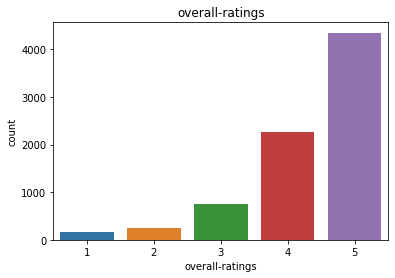

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(google_reviews['overall-ratings']).set(title = 'overall-ratings');

In [112]:
#create new df based on company
amazon_reviews = new_data.loc[new_data['company'] == 'amazon']
print(amazon_reviews)

      company                  location          dates  \
7819   amazon               Phoenix, AZ           None   
7820   amazon             Sunnyvale, CA   Dec 10, 2018   
7821   amazon               Seattle, WA   Jan 10, 2016   
7822   amazon               Seattle, WA   Feb 20, 2016   
7823   amazon               Seattle, WA   Dec 17, 2013   
...       ...                       ...            ...   
34244  amazon     Burghaslach (Germany)   Feb 26, 2016   
34245  amazon  Munich, Bayern (Germany)    Mar 6, 2016   
34246  amazon          Kassel (Germany)   Feb 22, 2016   
34247  amazon            Paris (France)   Feb 22, 2016   
34248  amazon    Hard Bargain (Jamaica)   Feb 22, 2016   

                                               job-title  \
7819     Current Employee - Software Development Manager   
7820   Current Employee - Manager, Software Developme...   
7821               Current Employee - Anonymous Employee   
7822       Current Employee - Senior Engineering Manager   
782

In [125]:
# Print location values 
print(amazon_reviews['location'].value_counts())

none                      9572
Seattle, WA               3988
Bengaluru (India)         1201
Hyderabad (India)         1197
Chennai (India)            653
                          ... 
Topanga, CA                  1
Toms River, NJ               1
Groveland, FL                1
Bainbridge, GA               1
Hard Bargain (Jamaica)       1
Name: location, Length: 1015, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


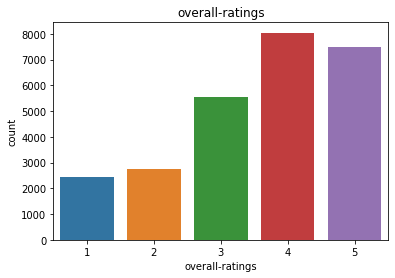

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(amazon_reviews['overall-ratings']).set(title = 'overall-ratings');

In [113]:
#create new df based on company
facebook_reviews = new_data.loc[new_data['company'] == 'facebook']
print(facebook_reviews)

        company                      location          dates  \
34249  facebook                Menlo Park, CA   Dec 11, 2018   
34250  facebook                Menlo Park, CA   Feb 16, 2017   
34251  facebook                Menlo Park, CA   Feb 16, 2016   
34252  facebook                Menlo Park, CA    Dec 3, 2018   
34253  facebook                   Seattle, WA    Dec 5, 2018   
...         ...                           ...            ...   
35834  facebook  Dublin, Co. Dublin (Ireland)   Jul 29, 2012   
35835  facebook             New Delhi (India)   Jun 26, 2012   
35836  facebook  Dublin, Co. Dublin (Ireland)   Jul 29, 2012   
35837  facebook  Dublin, Co. Dublin (Ireland)   Jun 20, 2012   
35838  facebook               Chennai (India)    Jun 2, 2012   

                                               job-title  \
34249              Current Employee - Product Operations   
34250              Current Employee - Anonymous Employee   
34251  Current Employee - Site Selection Program Ma

In [126]:
# Print location values 
print(facebook_reviews['location'].value_counts())

Menlo Park, CA                  797
Dublin, Co. Dublin (Ireland)    111
London, England (UK)             88
Seattle, WA                      86
New York, NY                     84
                               ... 
Santa Clara, CA                   1
Decatur, GA                       1
Charlotte, NC                     1
Daly City, CA                     1
New Delhi (India)                 1
Name: location, Length: 105, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


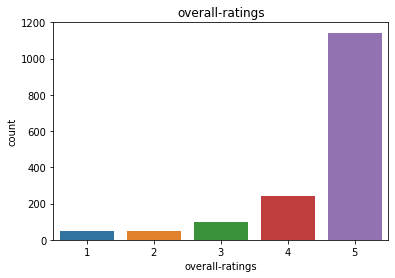

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(facebook_reviews['overall-ratings']).set(title = 'overall-ratings');

In [117]:
#create new df based on company
netflix_reviews = new_data.loc[new_data['company'] == 'netflix']
print(netflix_reviews)


       company               location          dates  \
35839  netflix                   none   Oct 22, 2018   
35840  netflix                   none   Sep 20, 2018   
35841  netflix                   none    Dec 5, 2018   
35842  netflix        Los Angeles, CA   Nov 30, 2018   
35843  netflix                   none   Nov 26, 2018   
...        ...                    ...            ...   
36644  netflix                   none   May 11, 2009   
36645  netflix                   none   May 22, 2009   
36646  netflix                   none   Nov 16, 2008   
36647  netflix                   none   Apr 20, 2018   
36648  netflix  Sartrouville (France)    Apr 2, 2018   

                                               job-title  \
35839              Current Employee - Anonymous Employee   
35840              Current Employee - Anonymous Employee   
35841               Former Employee - Anonymous Employee   
35842                     Former Employee - Video Editor   
35843               Former 

In [127]:
# Print location values 
print(netflix_reviews['location'].value_counts())

none                     246
Los Gatos, CA            243
Hillsboro, OR            105
Salt Lake City, UT        56
Los Angeles, CA           27
                        ... 
Columbus, OH               1
Gilroy, CA                 1
Pittsburgh, PA             1
North Las Vegas, NV        1
Sartrouville (France)      1
Name: location, Length: 61, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


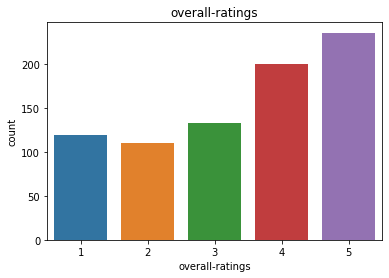

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(netflix_reviews['overall-ratings']).set(title = 'overall-ratings');

In [119]:
#create new df based on company
apple_reviews = new_data.loc[new_data['company'] == 'apple']
print(apple_reviews)

      company                  location          dates  \
36649   apple                      none   Dec 11, 2018   
36650   apple                      none   Aug 28, 2014   
36651   apple                 Tempe, AZ   Mar 10, 2017   
36652   apple              Lakewood, CO   May 13, 2015   
36653   apple                      none    Dec 8, 2018   
...       ...                       ...            ...   
49594   apple                      none    Sep 6, 2015   
49595   apple            Paris (France)    Sep 3, 2015   
49596   apple            Paris (France)   Jul 28, 2015   
49597   apple  Munich, Bayern (Germany)   Jun 29, 2015   
49598   apple         Hamburg (Germany)    Jun 7, 2015   

                                      job-title  \
36649     Current Employee - Anonymous Employee   
36650     Current Employee - Anonymous Employee   
36651             Current Employee - Specialist   
36652  Current Employee - Apple At Home Advisor   
36653     Current Employee - Anonymous Employee 

In [128]:
# Print location values 
print(apple_reviews['location'].value_counts())

none                     5332
Cupertino, CA            1262
New York, NY              445
Austin, TX                415
Cork (Ireland)            214
                         ... 
Bernalillo, NM              1
Arlington, TX               1
Cape Coral, FL              1
Chino Hills, CA             1
Rimouski, QC (Canada)       1
Name: location, Length: 881, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


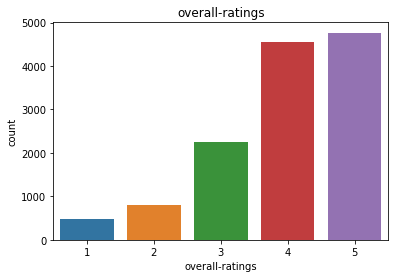

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(apple_reviews['overall-ratings']).set(title = 'overall-ratings');

In [121]:
#create new df based on company
microsoft_reviews = new_data.loc[new_data['company'] == 'microsoft']
print(microsoft_reviews)

         company     location          dates  \
49599  microsoft         none   Dec 11, 2018   
49600  microsoft  Redmond, WA   Jan 28, 2013   
49601  microsoft  Redmond, WA    Dec 9, 2018   
49602  microsoft  Chicago, IL    Dec 9, 2018   
49603  microsoft         none    Dec 9, 2018   
...          ...          ...            ...   
67524  microsoft         none   Dec 16, 2010   
67525  microsoft         none   Dec 16, 2010   
67526  microsoft         none   Dec 15, 2010   
67527  microsoft         none   Dec 15, 2010   
67528  microsoft         none   Dec 14, 2010   

                                         job-title  \
49599        Current Employee - Anonymous Employee   
49600        Current Employee - Anonymous Employee   
49601        Current Employee - Anonymous Employee   
49602                       Current Employee - CSA   
49603        Current Employee - Anonymous Employee   
...                                            ...   
67524         Former Employee - Anonymous Emp

In [129]:
# Print location values 
print(microsoft_reviews['location'].value_counts())

none                        6150
Redmond, WA                 5573
Seattle, WA                  747
Hyderabad (India)            738
Bellevue, WA                 435
                            ... 
Mukwonago, WI                  1
Greenville, OH                 1
Poulsbo, WA                    1
Medford, OR                    1
Pudong, Shanghai (China)       1
Name: location, Length: 557, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


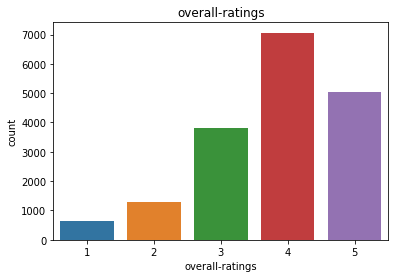

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(microsoft_reviews['overall-ratings']).set(title = 'overall-ratings');

**Data Cleaning Text**

In [133]:
!pip install contractions
import contractions

expanded_words = []   
for word in google_reviews_1.split():
  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word))  
   
expanded_text = ' '.join(expanded_words)
print('Original text: ' + google_reviews_1)
print('Expanded_text: ' + expanded_text)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 22.3 MB/s eta 0:00:00


AttributeError: ignored